In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [134]:
data = pd.read_csv('car.csv')

In [135]:
type(data)

pandas.core.frame.DataFrame

In [136]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [137]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [139]:
data.shape

(301, 9)

In [140]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [141]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [142]:
print(data['Seller_Type'].value_counts())
data['Transmission'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [143]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [144]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<Axes: xlabel='Fuel_Type', ylabel='count'>

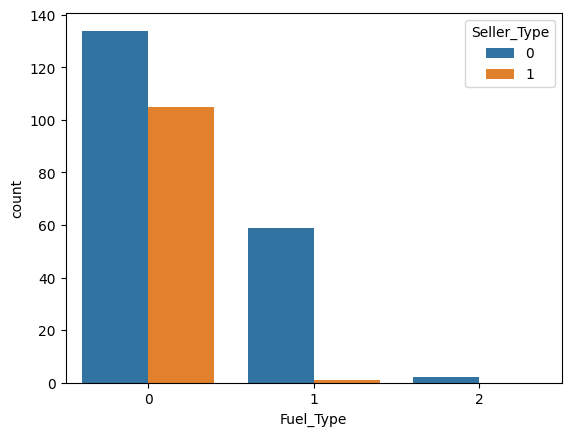

In [145]:
#data visulization
sb.countplot(x='Fuel_Type',hue='Seller_Type',data =data)

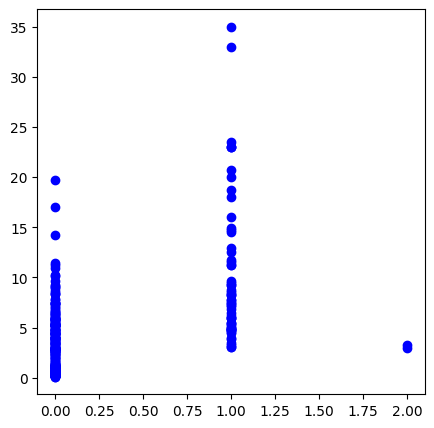

In [146]:
plt.figure(figsize=(5, 5))  # Set the figure size
plt.scatter(data['Fuel_Type'], data['Selling_Price'], color='blue')

In [147]:
#spliting data
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']

In [148]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [149]:
model = LinearRegression()

In [150]:
model.fit(X_train,Y_train)

LinearRegression()

model evalution

In [158]:
#model evalution
traing_predict = model.predict(X_train)

In [160]:
#rsquare error
error_score =metrics.r2_score(Y_train,traing_predict)
print("R square Error:",error_score)

R square Error: 0.8799451660493708


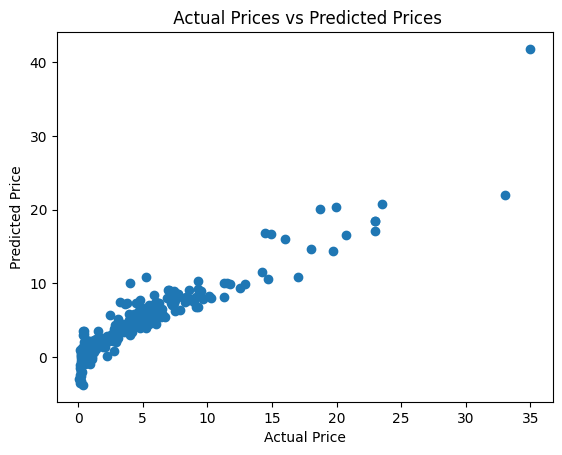

In [161]:
#visulization of actual and prediction
plt.scatter(Y_train, traing_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [165]:
test_data_prediction = model.predict(X_test)

In [167]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026374


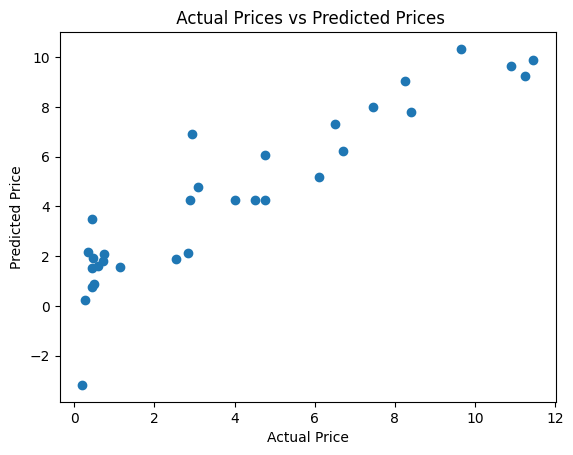

In [168]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()